In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# ** Data Job Ai di Dunia**

In [2]:
data = pd.read_csv("ai_job_dataset.csv")
data.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## Ubah ke dataframe

In [3]:
df = pd.DataFrame(data)
df["posting_date"] = pd.to_datetime(df["posting_date"])
df["aplication_deadline"] = pd.to_datetime(df["application_deadline"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

# Berapakah gaji untuk jenis pekerjaan Job AI

## Analisis per kolom

### Salary usd


Uji EDA (Exploratory Data Analysis)

In [4]:
df["salary_usd"].describe()

,salary_usd
count,15000.000000
mean,115348.965133
std,60260.940438
min,32519.000000
25%,70179.750000
50%,99705.000000
75%,146408.500000
max,399095.000000


mean > median : data ini miring ke kanan (skewed right)

rasio std = 60260.940438 / 115348.965133 = 0.52%

batas normal :


1.   lower bound : Q1 - 1.5 x IQR = −44,163.38
2.   upper bound : Q3 + 1.5 x IQR = 260,751.63

karena gaji maksimum lebih dari upper bond, data miring ke kanan (outlier ke kanan)

    



Visualisa hisplot

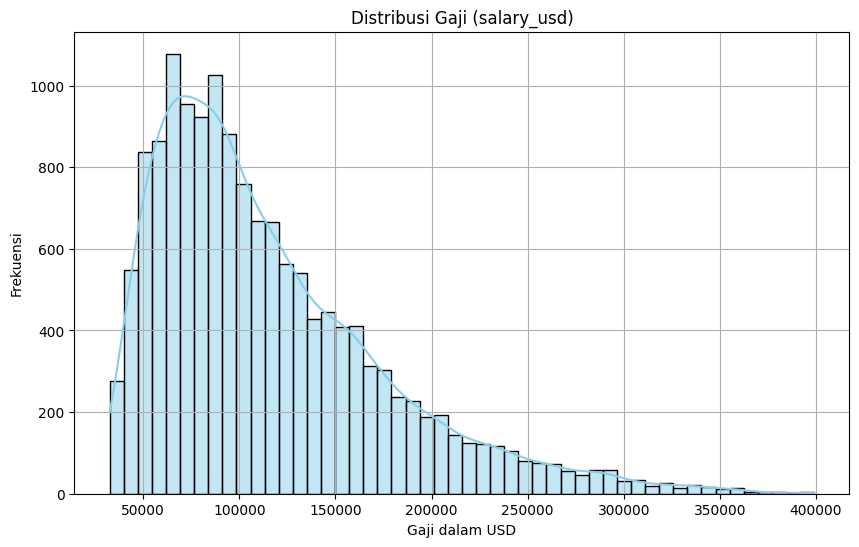

In [5]:
# hisplot salary usd
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="salary_usd", bins=50, kde=True, color="skyblue")
plt.title("Distribusi Gaji (salary_usd)")
plt.xlabel("Gaji dalam USD")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

Uji statistik

In [23]:
# karena datanya lebih dari 5000 uji normalitasnya  pakai D'agostino dan jarque bera
# D'agostino
x = df["salary_usd"].dropna()
stat1, p1 = normaltest(x)
print(f"normaltest: stats = {stat1:.3f}, p = {p1:.10f}")

#jarque-Bera
from scipy.stats import jarque_bera
stat2, p2 = jarque_bera(x)
print(f"jarque-Bera: stats = {stat2:.3f}, p = {p2:.10f}")





normaltest: stats = 2982.268, p = 0.0000000000
jarque-Bera: stats = 5459.956, p = 0.0000000000


bisa dilihat p value uji normalitas kurang dari 0,05  di indikasiakan positif data salary usd tidak normal

### Job title

In [41]:
# proporsi masing"
top_job = df["job_title"].value_counts().sort_values(ascending=False)
top_job


,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


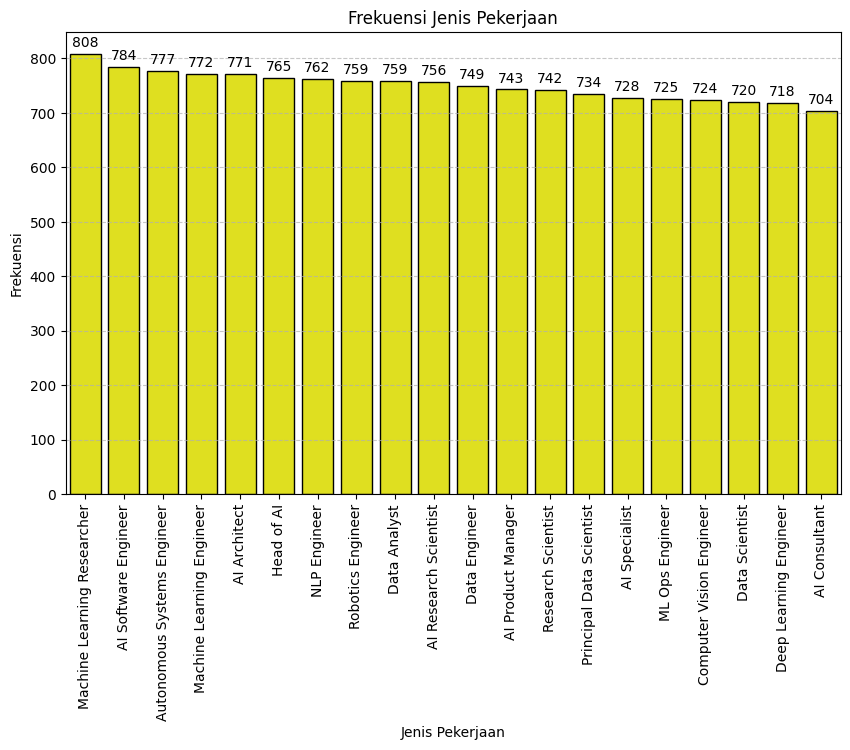

In [55]:
# visualisasi
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_job.index, y=top_job.values, color="yellow", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)
plt.title("Frekuensi Jenis Pekerjaan")
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Frekuensi")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.show()


Dari grafik terlihat bahwa peran Machine Learning Researcher menempati posisi teratas dalam frekuensi kemunculan, diikuti oleh AI Software Engineer dan Autonomous Systems Engineer. Meski begitu, perbedaan jumlah antar pekerjaan tidak terlalu signifikan, menunjukkan bahwa permintaan terhadap berbagai peran di bidang AI cukup seimbang

### Meganalisa antara job title dan gaji

In [7]:
# median  gaji per job
gaji_per_job = df.groupby("job_title")["salary_usd"].median().sort_values(ascending=False) # pakai median karena diawal udah di lihat karena datanya tidak normal
gaji_per_job



,salary_usd
job_title,
Data Engineer,104447.0
Machine Learning Engineer,103687.0
AI Specialist,103626.5
Head of AI,102025.0
ML Ops Engineer,101624.0
AI Consultant,101471.0
AI Research Scientist,100990.0
Robotics Engineer,100714.0
Data Scientist,100529.5


### Visualisasi median gaji dan jenis pakerjaan

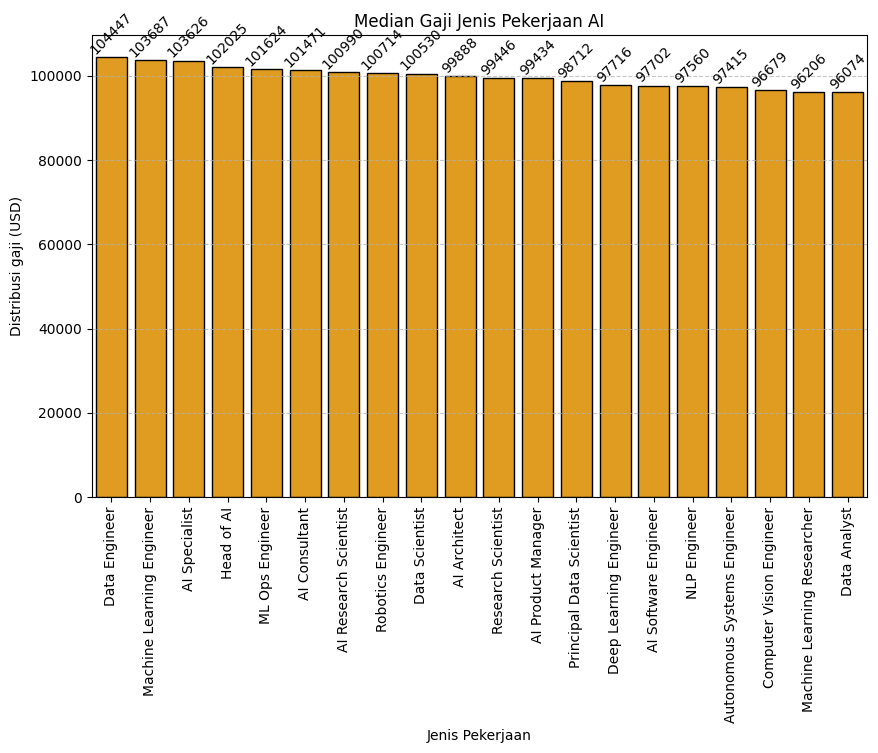

In [45]:
# Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gaji_per_job.index, y=gaji_per_job.values, color="orange", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", rotation=45)
plt.title("Median Gaji Jenis Pekerjaan AI")
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Distribusi gaji (USD)")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.show()

Plot di atas memperlihatkan perbandingan median gaji berdasarkan jenis pekerjaan di bidang AI. Terlihat bahwa Data Engineer dan Machine Learning Engineer memperoleh kompensasi median tertinggi, yaitu sekitar 104.000 USD per tahun. Sementara itu, Data Analyst dan Machine Learning Researcher memiliki median gaji paling rendah, meski tetap berada di kisaran $96.000 USD, yang masih termasuk tinggi dalam standar industri. Perbedaan antar jenis pekerjaan tidak ekstrem, namun tetap memberi gambaran bahwa posisi seperti engineering dan spesialisasi memiliki daya tawar lebih tinggi dalam kompensasi.

## Analisis apakah gaji antar job berbeda secara signifikan atau tidak

In [46]:
from scipy.stats import mannwhitneyu
group1 = df[df['job_title'] == 'Machine Learning Engineer']['salary_usd']
group2 = df[df['job_title'] == 'Data Scientist']['salary_usd']
stat, p = mannwhitneyu(group1, group2)
print(f"P-value = {p:.4f}")


P-value = 0.4545


tidak ada bukti signifikan bahwa gaji "Machine Learning Engineer" dan "Data Scientist" berbeda secara statistik. sama seperti ditabel, semua madian gaji sedikit berbeda di banding lainnya

# Apakah pekerjaan remote mempengaruhi gaji

### analisis remote ratio

In [49]:
# analisis remote ratio
df["remote_ratio"].value_counts()

,count
remote_ratio,
0,5075
50,5005
100,4920


0 = full onsite

50 = hybrid

100 = full remote

## Berapakah gaji yang didapatkan saat bekerja remot dan kantor

In [16]:
# rata-rata gaji perrjaan remote dan tidak
remote_gaji = df.groupby("remote_ratio")["salary_usd"].median()
remote_gaji

,salary_usd
remote_ratio,
0,98817.0
50,99295.0
100,100614.0


0 = full onsite

50 = hybrid

100 = full remote

salary_usd → gaji dalam USD

### visualisasi

Text(0, 0.5, 'Distribusi (USD)')

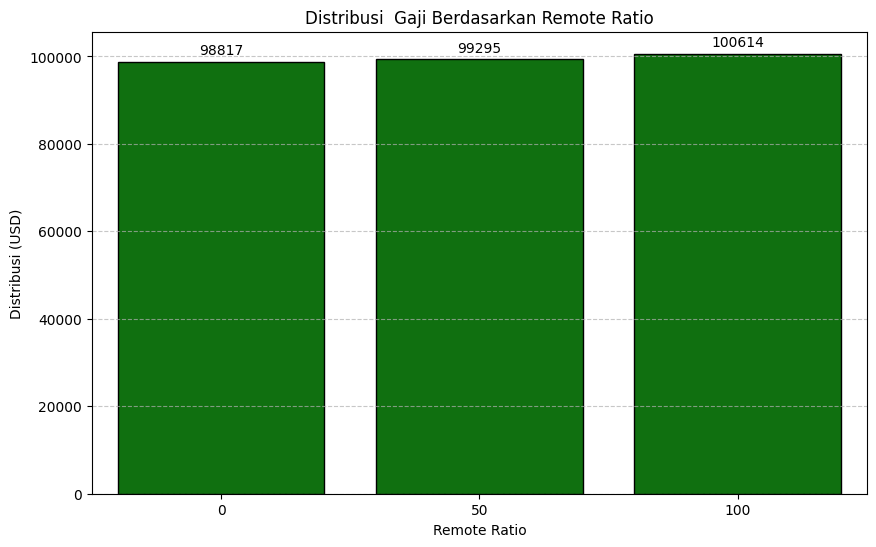

In [17]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=remote_gaji.index, y=remote_gaji.values, color="green", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container , fmt="%.0f", padding=3)
plt.title("Distribusi  Gaji Berdasarkan Remote Ratio")
plt.xlabel("Remote Ratio")
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.ylabel("Distribusi (USD)")

Secara umum, semakin tinggi remote_ratio (semakin remote), median gaji cenderung naik.

Insight:
1.   Pekerja full remote (100%) memiliki median gaji tertinggi
2.   Pekerja on-site (0%) memiliki median gaji terendah.
3.   Perbedaan gaji antar kategori tidak terlalu besar.


### Analisis statistik gaji berdasarkan remote, apakah ada pebedaan anatara kategori berdasarkan gaji

In [50]:
from scipy.stats import kruskal

g0 = df[df['remote_ratio'] == 0]['salary_usd']
g50 = df[df['remote_ratio'] == 50]['salary_usd']
g100 = df[df['remote_ratio'] == 100]['salary_usd']

stat, p = kruskal(g0, g50, g100)
print(f"P-value: {p:.4f}")

P-value: 0.1266


Distribusi gaji ketiga kategori ini dianggap mirip (secara statistik), sama seperti di tabel bedanya sedikit

# Apakah pengalaman dan gelar mempengaruhi gaji

In [18]:
#hitung rata" gaji berdasarkan pengalaman dan pendidikan
gaji = df.pivot_table(
    index="experience_level",
    columns="education_required",
    values="salary_usd",
    aggfunc="median"
    )
gaji

education_required,Associate,Bachelor,Master,PhD
experience_level,,,,
EN,60583.5,59823.0,60443.5,60578.0
EX,176004.0,178513.0,174800.5,179955.0
MI,84980.0,84863.0,84934.0,82632.5
SE,115871.5,117817.5,117146.0,117083.0


experience_level

EN (Entry Level)
MI (Mid)
SE (Senior)
EX (Executive)

### visualisasi

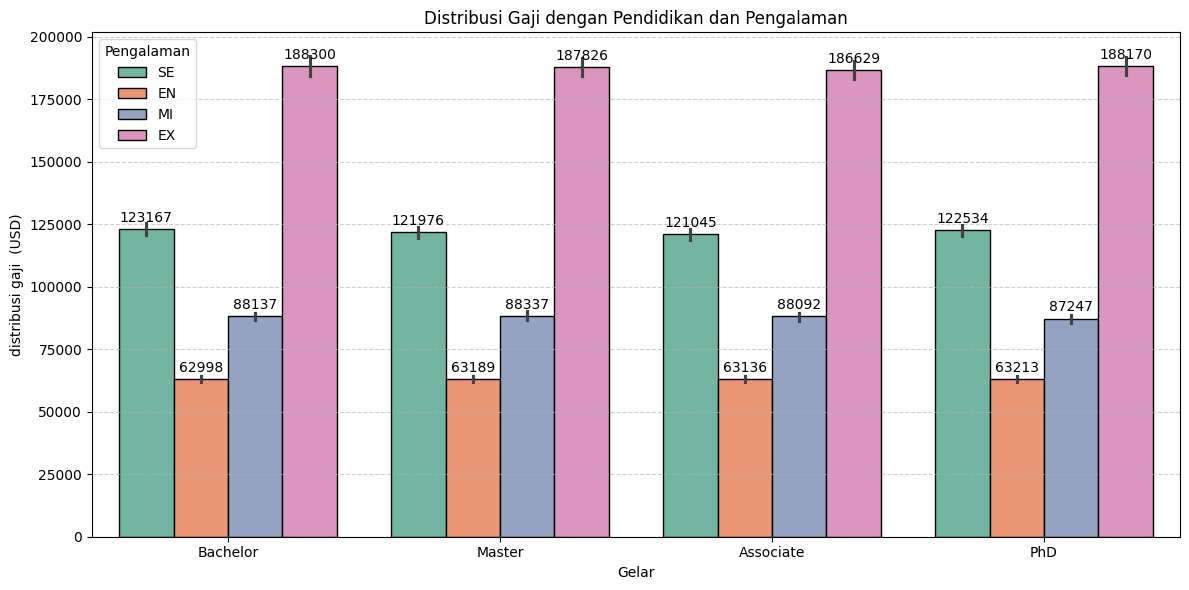

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="education_required", y="salary_usd", hue="experience_level", estimator="mean", palette="Set2", edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)
plt.title("Distribusi Gaji dengan Pendidikan dan Pengalaman")
plt.xlabel("Gelar")
plt.ylabel("distribusi gaji  (USD)")
plt.legend(title="Pengalaman")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Gaji dalam bidang AI secara konsisten meningkat seiring bertambahnya level pengalaman, terlepas dari tingkat pendidikan. Hal ini menunjukkan bahwa pengalaman kerja (senior, executive) adalah faktor yang jauh lebih menentukan dalam kompensasi gaji dibandingkan latar belakang akademis

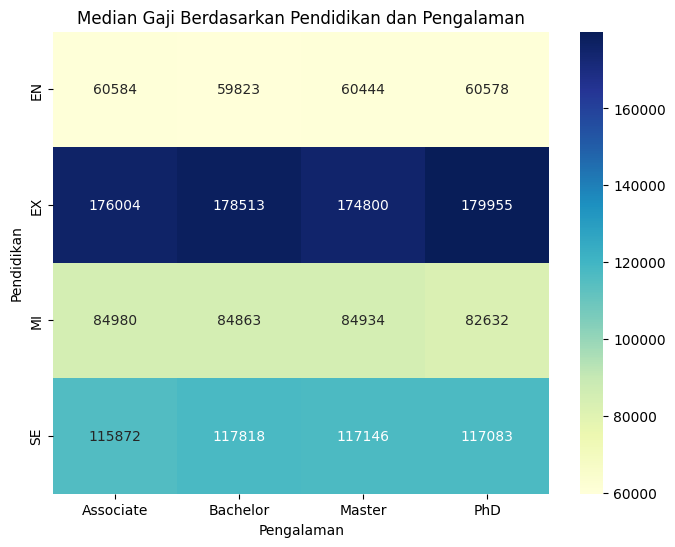

In [59]:
#heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(gaji, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Median Gaji Berdasarkan Pendidikan dan Pengalaman")
plt.xlabel("Pengalaman")
plt.ylabel("Pendidikan")
plt.show()

### Uji Statistik

In [63]:
from scipy.stats import kruskal
# gaji berdasarkan experience level
groups = [g['salary_usd'].values for _, g in df.groupby('experience_level')]
stat, p = kruskal(*groups)
print(f"experiance_level vs salary usd : p = {p:.4f}")

experiance_level vs salary usd : p = 0.0000


ada perbedaan signifikan antar level pengalaman, sama seperti di tabel

In [62]:
groups = [g['salary_usd'].values for _, g in df.groupby('education_required')]
stat, p = kruskal(*groups)
print(f"Gaji vs Gelar: p = {p:.4f}")

Gaji vs Gelar: p = 0.0804


tidak ada perbedaan yang signiifikan di pengalaman dengan gaji, seperti aynag ada di tabel

# Negara mana yang lebih kompetitif dengan gaji

In [20]:
kompe_gaji = df.groupby("company_location")["salary_usd"].median().sort_values(ascending=False)
kompe_gaji

,salary_usd
company_location,
Switzerland,152901.0
Denmark,147504.5
Norway,142386.0
United States,128606.0
United Kingdom,115281.0
Singapore,115122.0
Netherlands,112202.0
Sweden,109435.0
Germany,106923.0


### Visualisasi

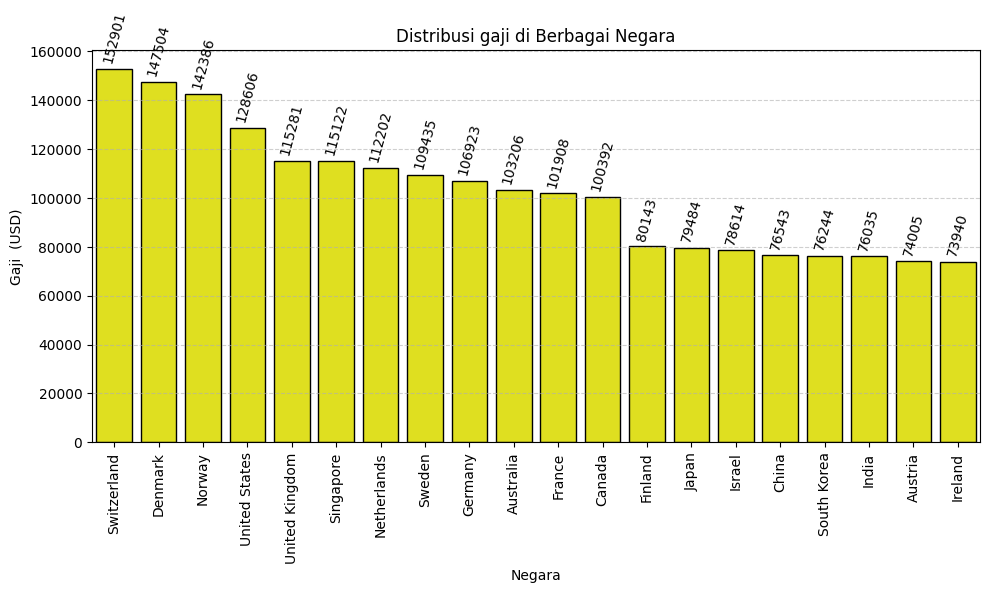

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kompe_gaji.index, y=kompe_gaji.values, color="yellow", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, rotation=75)
plt.title("Distribusi gaji di Berbagai Negara")
plt.xlabel("Negara")
plt.ylabel("Gaji  (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Data menunjukkan ketimpangan geografis dalam kompensasi pekerjaan AI. Negara-negara Eropa Barat dan Amerika Utara menawarkan gaji yang lebih tinggi, kemungkinan karena tingginya biaya hidup, permintaan tenaga kerja ahli, dan pasar teknologi yang matang. Sebaliknya, negara-negara Asia dan Eropa Timur menawarkan gaji lebih rendah namun bisa kompetitif jika disesuaikan dengan biaya hidup lokal.

### Anlisis statistik apakah ada perbedaan gaji antar negara

In [67]:
groups = [g['salary_usd'].values for _, g in df.groupby('company_location')]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis Gaji vs Negara: p = {p:.4f}")

Kruskal-Wallis Gaji vs Negara: p = 0.0000


terdapat perbedaan gaji berdasarkan negara